<a href="https://colab.research.google.com/github/yns030506/Colab_nlp-study/blob/main/lsa_nlp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<키워드 분석(Keyword Analysis)>

- 핵심어 : 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어/문구
- 핵심어 분석 : 불용어 제거, 어간 추출, 형태소 분석 등의 자연어 처리 시행 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어 추출
- 특정 텍스트 자료에서 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초
- 영어의 전치사, 한국어의 조사 등의 불용어는 제외하는 것이 좋음.
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용됨.

- 한글 폰트 설정
- 실행 후 재시작 필요

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

%config InlinkBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
# mpl.fm._rebuild()

fe = fm.FontEntry(fname = fontpath, name = 'NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size' : 10, 'font.family' : 'NanumBarunGothic'})

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


한국어 자연어 처리 konlpy와 Mecab(형태소 분석기) 설치

In [13]:
pip install mecab-python3
#얘가 install돼야 아래 코드가 실행되나봄

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 7.1 MB/s eta 0:00:00


In [14]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


네이버 영화 리뷰 데이터
https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [15]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

##데이터가 모두 바이트로 이루어져 있음. 리뷰 외 다른 데이터 존재.

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [16]:
#데이터를 문자열로 변환 + 리뷰만 추출
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


<형태소 분석을 이용한 명사 추출>

In [18]:
#형태소 분석기 Mecab으로 명사만 추출
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    nouns.append(noun)

nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

<불용어 사전 만들기>

- 형태소 분석으로 조사, 접속사 등 제거
- 불필요한 명사도 제거
- 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
- (ex) 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것
- 빈도가 너무 큰 단어(ex : 영화) 도 제거 필요

In [20]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(" ")

print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


In [22]:
nouns = []
for review in reviews: #리뷰 가져오기
  for noun in tagger.nouns(review): #형태소 분석 후 명사만 가져오고
    if noun not in stop_words: #stop_words에 없으면
      nouns.append(noun) #append

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

<단어 빈도수 측정>

- collections 라이브러리의 Counter함수 사용

In [23]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
print(top_nouns)

{'연기': 9174, '최고': 8811, '평점': 8513, '스토리': 7165, '생각': 6919, '드라마': 6889, '사람': 6741, '감동': 6489, '배우': 5877, '내용': 5731, '감독': 5628, '재미': 5476, '시간': 5324, '년': 4934, '사랑': 4742, '쓰레기': 4584, '작품': 3982, '하나': 3878, '정도': 3659, '마지막': 3647, '이건': 3595, '액션': 3568, '기대': 3477, '장면': 3262, '편': 3044, '이게': 3020, '최악': 3017, '돈': 2981, '이야기': 2947, '애': 2717, '명작': 2685, '처음': 2684, '여자': 2677, '이해': 2671, '이상': 2643, '한국': 2633, '주인공': 2554, '우리': 2532, '연출': 2376, '때문': 2371, '기억': 2364, '현실': 2191, '마음': 2128, '굿': 2110, '남자': 2078, '결말': 2066, '인생': 2056, '공포': 2046, '전개': 2035, '짜증': 2011}


<단어 빈도 시각화>

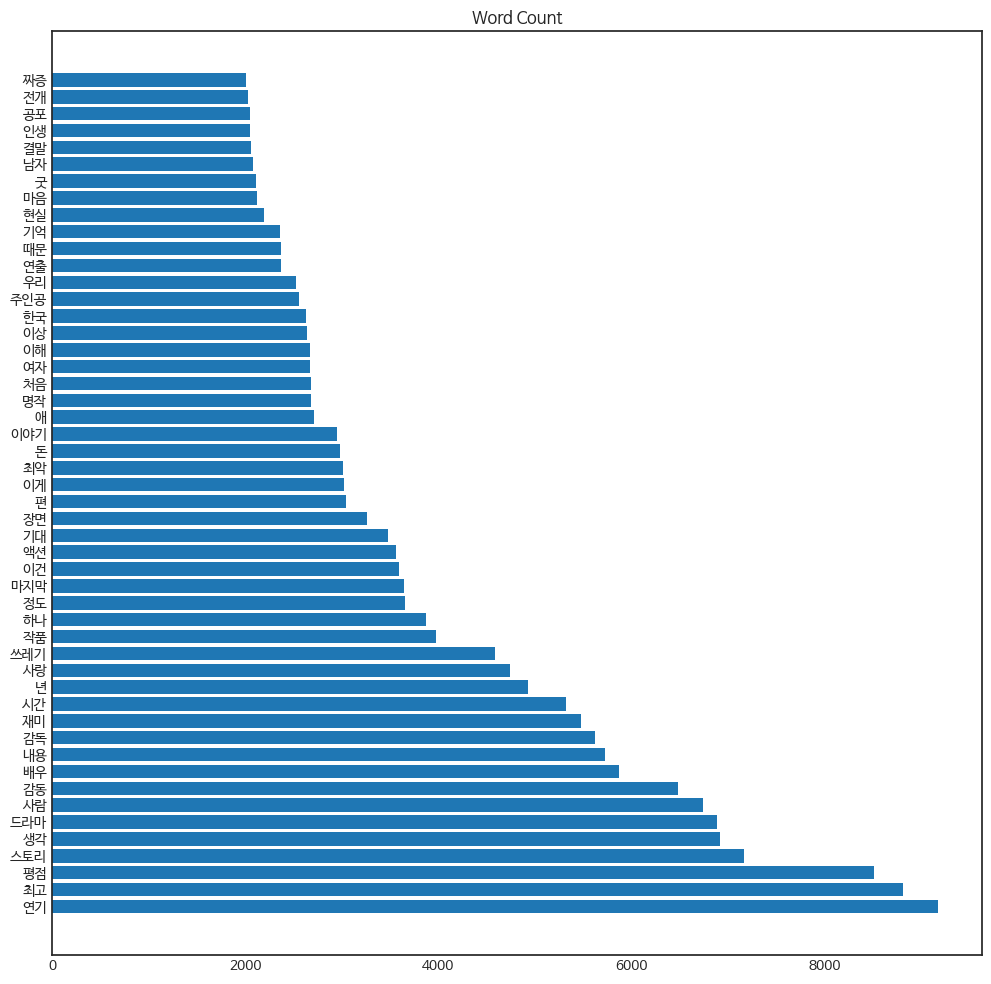

In [24]:
import numpy as np

y_pos = np.arange(len(top_nouns))

figure = plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_nouns.keys())
plt.show()

<워드클라우드(WordCloud)>

- 형태소들의 등장 빈도 시각화
- 단어의 빈도 수에 따라 크기가 다르게 구름 형태로 표현.
- 단어 사이 연관성, 의미 구조 분석에는 한계가 있음.

- matplotlib와 WordCloud 라이브러리 import 해서 사용

In [25]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

<function matplotlib.pyplot.show(close=None, block=None)>

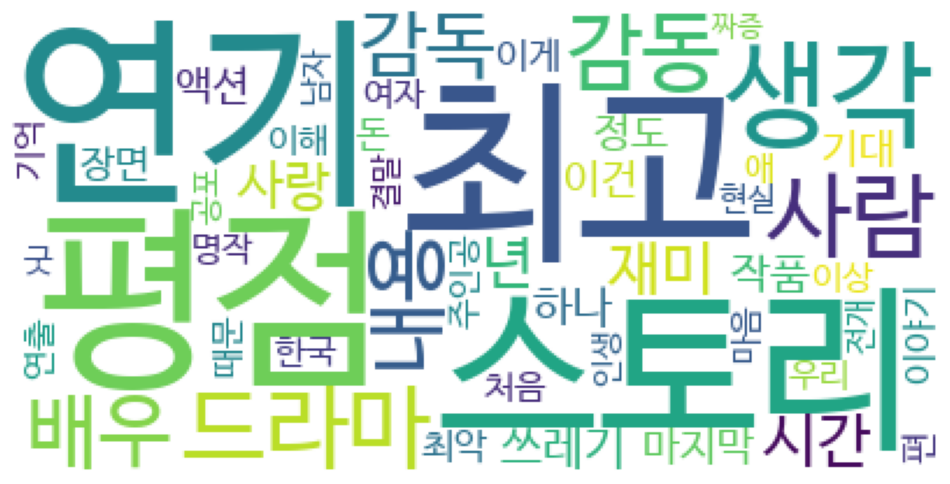

In [28]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

<squarify 트리맵 시각화>

In [29]:
!pip install squarify

<Axes: >

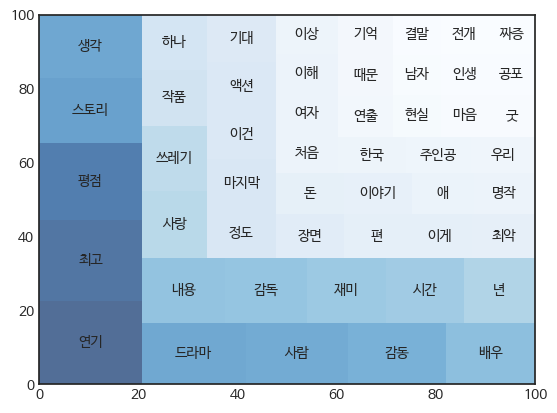

In [33]:
import squarify
import matplotlib

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [matplotlib.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7) #투명도